# 1. Introduce Used Package and Data

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [12]:
# Introduce the used data
initial_data = pd.read_csv('bank.data.csv')
initial_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2. Data Exploration and Analysis

## 2.1 Understand the Data

In [14]:
# Check the information of data
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Chech the unique value for each category(column) in the data
initial_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [15]:
# Here choose the 'Exited' as the target variable, therefore, this is try to predict value of 'Exited' with other variables under given value of 'Exited'
y = initial_data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
# Try to find if there are some missing values
initial_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Find numerical features
# They are 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts', 'Balance', 'EstimatedSalary'
initial_data[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


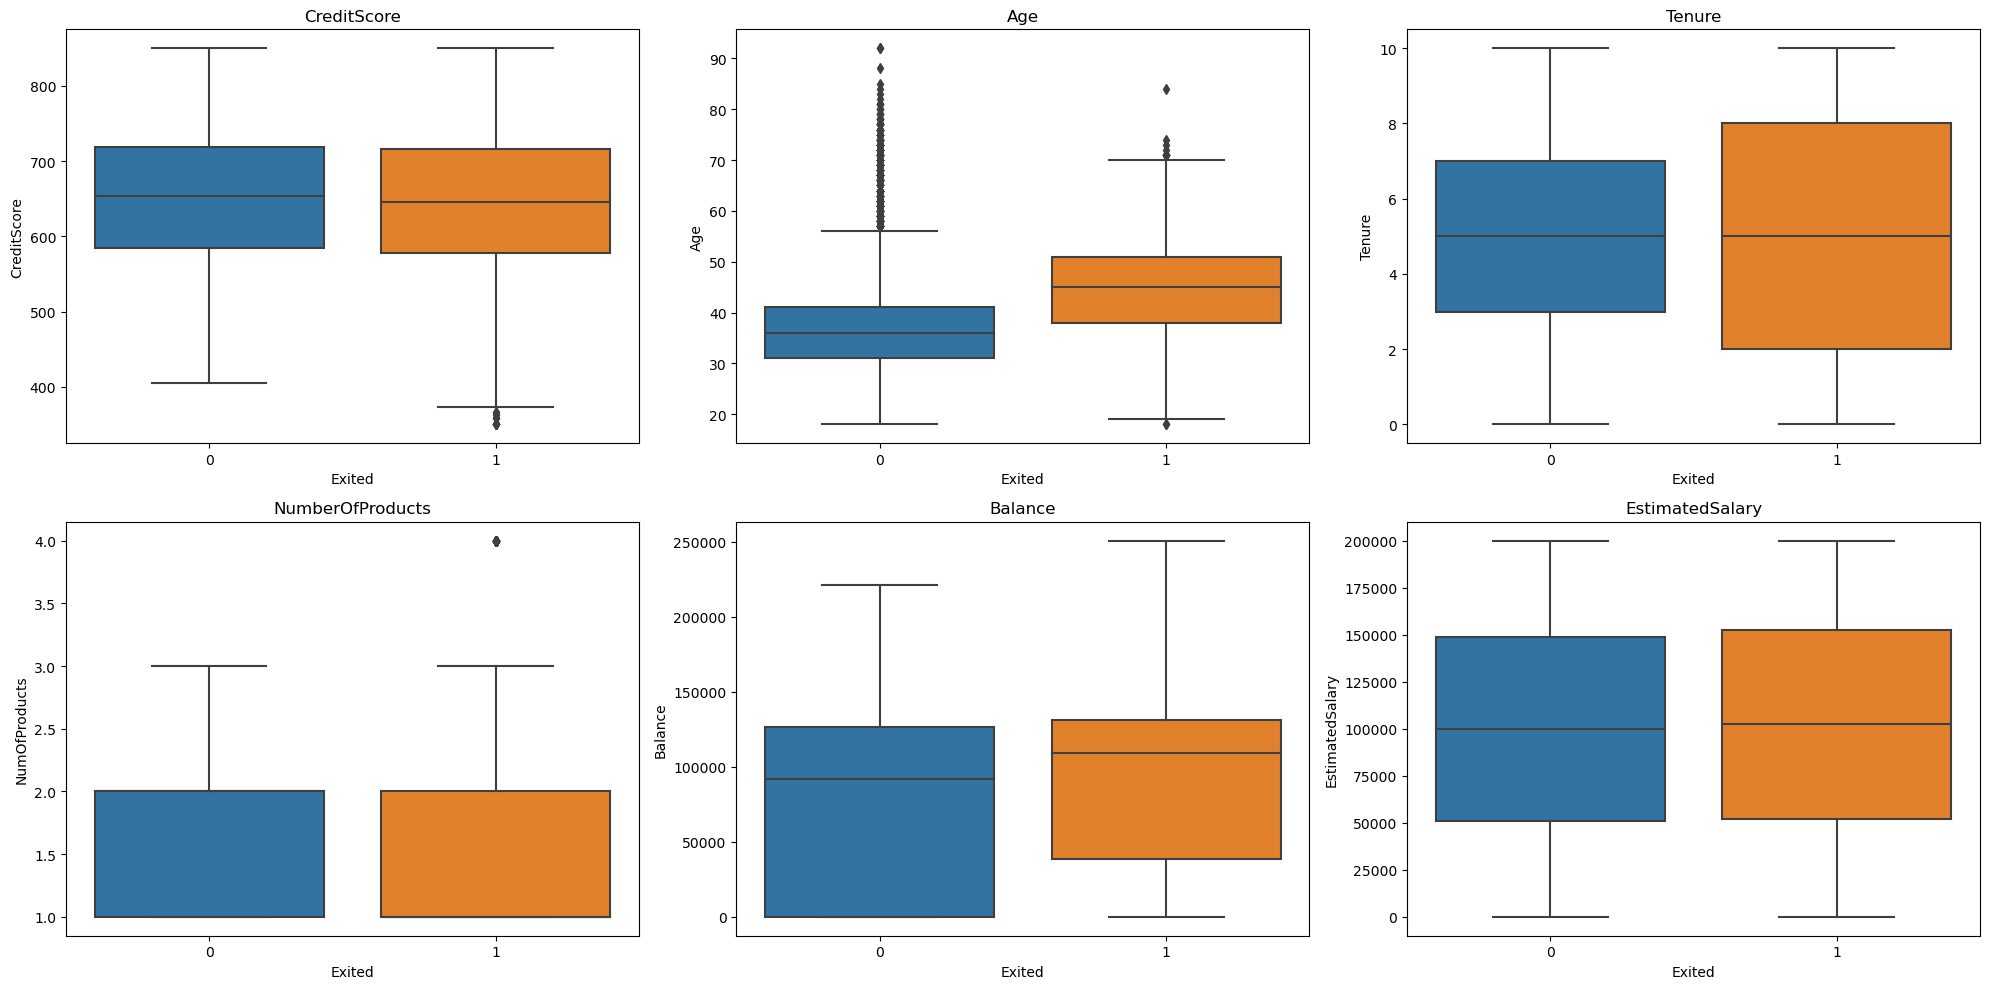

In [ ]:
# Then use boxplot to find the difference of distribution of exited and non-exited bank customers towards different features such as 'CreditScore'

fig, axss = plt.subplots(2,3, figsize=[20,10])

sns.boxplot(x='Exited', y ='CreditScore', data=initial_data, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=initial_data, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=initial_data, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=initial_data, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=initial_data, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=initial_data, ax=axss[1][2])

numerical_categories_name = ['CreditScore', 'Age', 'Tenure', 'NumberOfProducts', 'Balance', 'EstimatedSalary']
for i, ax in enumerate(axss.flat):
    ax.set_title(list(numerical_categories_name)[i])
plt.tight_layout()
plt.show()

In [ ]:
# Find categorical features
# They are 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'
initial_data[['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']]

,Geography,Gender,HasCrCard,IsActiveMember
0,France,Female,1,1
1,Spain,Female,0,1
2,France,Female,1,0
3,France,Female,0,0
4,Spain,Female,1,1
...,...,...,...,...
9995,France,Male,1,0
9996,France,Male,1,1
9997,France,Female,0,1
9998,Germany,Male,1,0


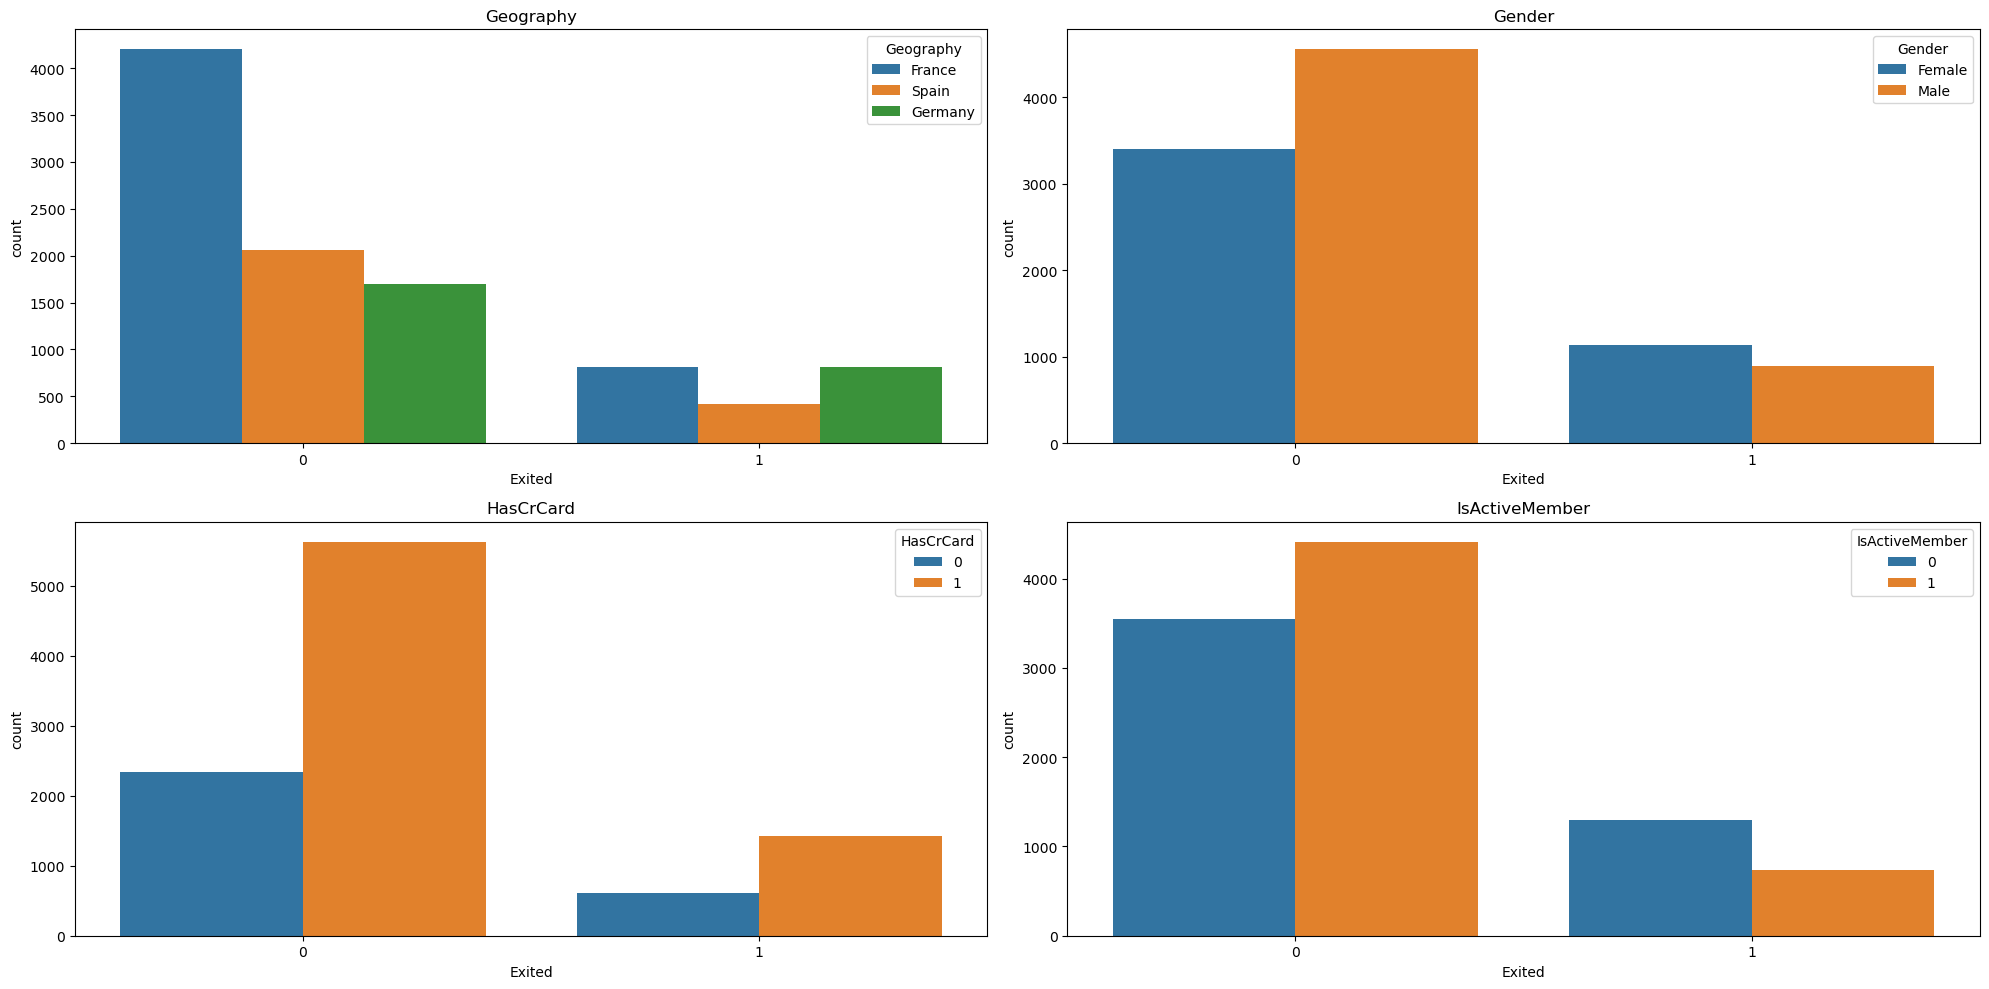

In [ ]:
# Then use boxplot to find the difference of distribution of exited and non-exited bank customers towards different categorical features such as 'RowNumber'
fig, axss = plt.subplots(2,2, figsize=[20,10])

sns.countplot(x='Exited', hue='Geography', data=initial_data, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=initial_data, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=initial_data, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=initial_data, ax=axss[1][1])

categorical_feature_name = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
for j, ax in enumerate(axss.flat):
    ax.set_title(list(categorical_feature_name)[j])
plt.tight_layout()
plt.show()

## 2.2 Feature Processing

In [ ]:
# Drop useless features such as customers' id and the target variable
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = initial_data.drop(to_drop, axis = 1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [27]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [28]:
# Divide the data space into 2 parts: numerical and categorical
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]
print(cat_cols)
print(num_cols)

Index(['Geography', 'Gender'], dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


## 2.3 Data Spilt

In [29]:
# Here split the data into training data(75%) and testing data(25%) 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state = 1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 10 features
test data has 2500 observation with 10 features


In [30]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7971,633,Spain,Male,42,10,0.00,1,0,1,79408.17
9152,708,Germany,Female,23,4,71433.08,1,1,0,103697.57
6732,548,France,Female,37,9,0.00,2,0,0,98029.58
902,645,France,Female,48,7,90612.34,1,1,1,149139.13
2996,729,Spain,Female,45,7,91091.06,2,1,0,71133.12


## 2.4 Handle the Categorical Features

### 2.4.1 One Hot Encoding

In [ ]:
# Here use one hot encoding to transform the 'Geography' into 3 different features with value of only 1 or 0 (numerical)
# Under 'Geography' feature, all customers have 3 countries Spain, Germany, and France, therefore 3 features of respective 3 countries
# In detail, the Geography of one customer is shown with 1 under this feature indicating this country and 0 indicating not this country
def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns = enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

### 2.4.2 Ordinal Encoding

In [ ]:
# Here use ordinal encoding to transform the 'Gender' into numerical feature
# Because there are only 2 type of gender(male or female) in the data, therefore could use 1 to represent one and 0 for another
categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories])

X_train[categories] = enc_oe.transform(X_train[categories])
X_test[categories] = enc_oe.transform(X_test[categories])

In [ ]:
# Finally, there are only numerical data in the whole data space
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


## 2.5 Standardization

In [ ]:
# Here standardize the data to avoid the effect of magnitudes and units
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.172985,1.0,0.289202,1.731199,-1.218916,-0.912769,-1.542199,0.968496,-0.352044,0.0,0.0,1.0
1,0.602407,0.0,-1.509319,-0.341156,-0.076977,-0.912769,0.648425,-1.032529,0.072315,0.0,1.0,0.0
2,-1.051762,0.0,-0.184093,1.385806,-1.218916,0.796109,-1.542199,-1.032529,-0.026711,1.0,0.0,0.0
3,-0.048922,0.0,0.857156,0.695022,0.229625,-0.912769,0.648425,0.968496,0.866221,1.0,0.0,0.0
4,0.819517,0.0,0.573179,0.695022,0.237278,0.796109,0.648425,-1.032529,-0.496617,0.0,0.0,1.0


# 3. Model Training and Result Evaluating

## 3.1 Model Training

### 3.1.1 Logistic Regression

In [40]:
classifier_logistic = LogisticRegression()
classifier_logistic.fit(X_train, y_train)
classifier_logistic.predict(X_test)
classifier_logistic.score(X_test, y_test)

0.8088

### 3.1.2 K Nearest Neighbors

In [41]:
classifier_KNN = KNeighborsClassifier()
classifier_KNN.fit(X_train, y_train)
classifier_KNN.predict(X_test)
classifier_KNN.score(X_test, y_test)

0.8336

### 3.1.3 Random Forest

In [ ]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
classifier_RF.predict(X_test)
classifier_RF.score(X_test, y_test)

0.8088

## 3.2 Find the Optimal Hyperparameters - Through Grid Search

In [42]:
# Define the helper function for printing out grid search results
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

### 3.2.1 Logistic Regression

In [ ]:
# Possible hyperparamter options for Logistic Regression Regularization are: 
# Penalty (L1 or L2) and C is the 1/lambda value(weight)
parameters = {
    'penalty':('l2','l1'),
    'C':(0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1)
}

Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv = 5)
Grid_LR.fit(X_train, y_train)

print_grid_search_metrics(Grid_LR)

Best score: 0.8125333333333333
Best parameters set:
C:0.2
penalty:l1


In [47]:
best_LR_model = Grid_LR.best_estimator_
best_LR_model.predict(X_test)
best_LR_model.score(X_test, y_test)

0.81

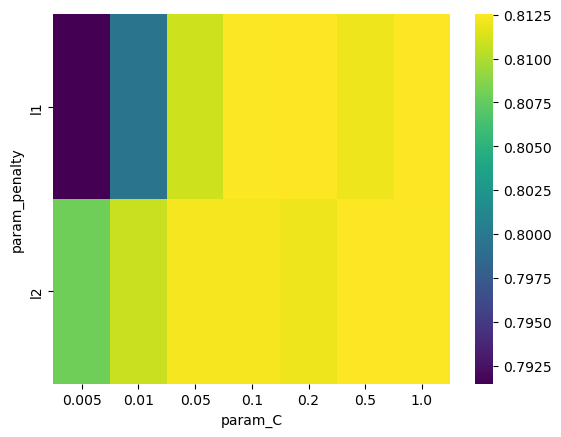

In [ ]:
# Use thermodynamic diagram to find the change of score with the change of parameter penalty and C
LR_models = pd.DataFrame(Grid_LR.cv_results_)
LR_models['param_C'] = pd.to_numeric(LR_models['param_C'], errors='coerce')
res = (LR_models.pivot(index='param_penalty', columns='param_C', values='mean_test_score'))
_ = sns.heatmap(res, cmap='viridis')

### 3.2.2 K Nearest Neighbors

In [55]:
# Possible hyperparamter options for KNN is only k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}

Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

print_grid_search_metrics(Grid_KNN)

Best score: 0.8433333333333334
Best parameters set:
n_neighbors:9


In [56]:
best_KNN_model = Grid_KNN.best_estimator_
best_KNN_model.predict(X_test)
best_KNN_model.score(X_test, y_test)

0.8428

### 3.2.3 Random Forest

In [ ]:
# Possible hyperparamter options for Random Forest are number and depth
# Choose the number of trees and the maximum depth
parameters = {
    'n_estimators' : [60,70,80,90,100],
    'max_depth': [1,5,10]
}

Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

print_grid_search_metrics(Grid_RF)

Best score: 0.8658666666666667
Best parameters set:
max_depth:10
n_estimators:70


In [58]:
best_RF_model = Grid_RF.best_estimator_
best_RF_model.predict(X_test)
best_RF_model.score(X_test, y_test)

0.8596

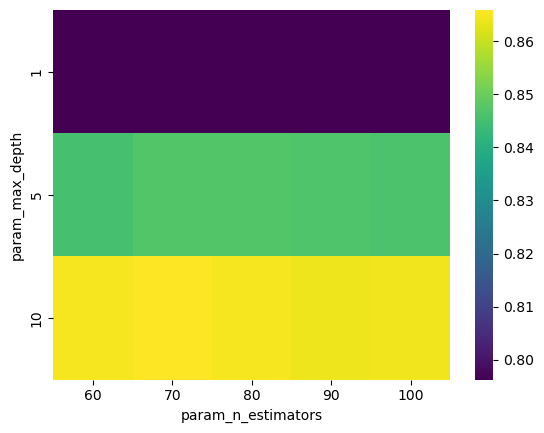

In [ ]:
# Use thermodynamic diagram to find the change of score with the change of parameter number and depth
LR_models = pd.DataFrame(Grid_RF.cv_results_)
LR_models['param_n_estimators'] = pd.to_numeric(LR_models['param_n_estimators'], errors='coerce')
LR_models['param_max_depth'] = pd.to_numeric(LR_models['param_max_depth'], errors='coerce')
res = (LR_models.pivot(index='param_max_depth', columns='param_n_estimators', values='mean_test_score'))
_ = sns.heatmap(res, cmap='viridis')

## 3.3 Model Evaluation - Confusion Matrix

In [ ]:
# Define function to calculate the accuracy, precision, and recall of model
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

# Define function to print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matricies:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)

In [ ]:
# Show the confusion matrix, accuracy, precison and recall for random forest, logistic regression, and k nearest neighbor
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8596
precision is: 0.8038461538461539
recall is: 0.4106090373280943

Logistic Regression
Accuracy is: 0.81
precision is: 0.6049382716049383
recall is: 0.1925343811394892

K nearest neighbor
Accuracy is: 0.8428
precision is: 0.7283464566929134
recall is: 0.36345776031434185



## 3.4 Model Evaluation - ROC Curve and AOC Score

### 3.4.1 Logistic Regression

In [72]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)
best_LR_model.predict_proba(X_test)

array([[0.82264804, 0.17735196],
       [0.92925245, 0.07074755],
       [0.85488766, 0.14511234],
       ...,
       [0.71584024, 0.28415976],
       [0.89060051, 0.10939949],
       [0.85476922, 0.14523078]])

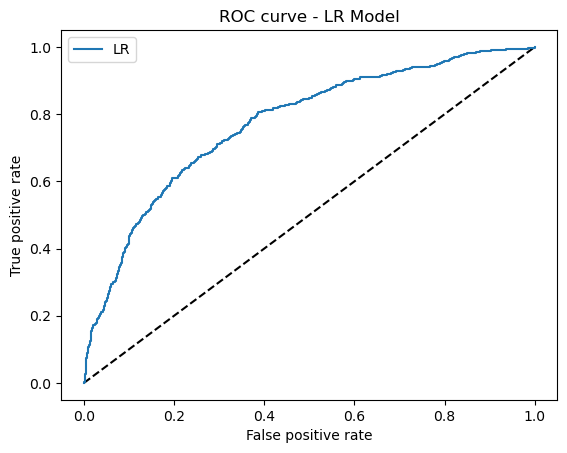

In [73]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [74]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7720774921330664

### 3.4.2 K Nearest Neighbors

In [69]:
# Use predict_proba to get the probability results of K Nearest Neighbors
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn)
best_KNN_model.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       ...,
       [0.77777778, 0.22222222],
       [1.        , 0.        ],
       [1.        , 0.        ]])

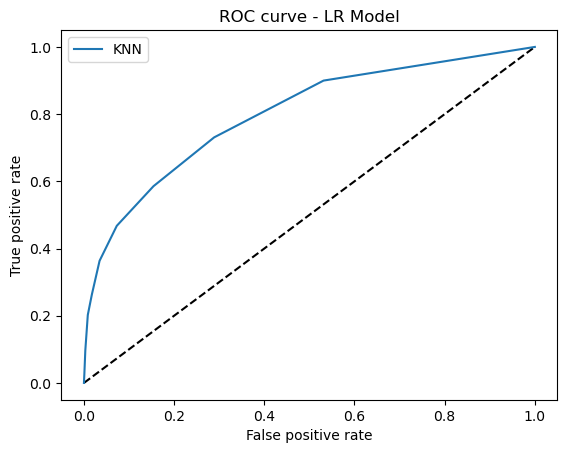

In [70]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [71]:
# AUC score
metrics.auc(fpr_knn,tpr_knn)

0.7986385690420251

### 3.4.3 Random Forest

In [75]:
# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
best_RF_model.predict_proba(X_test)

array([[0.74215029, 0.25784971],
       [0.93062799, 0.06937201],
       [0.73169076, 0.26830924],
       ...,
       [0.84599908, 0.15400092],
       [0.94674212, 0.05325788],
       [0.92396171, 0.07603829]])

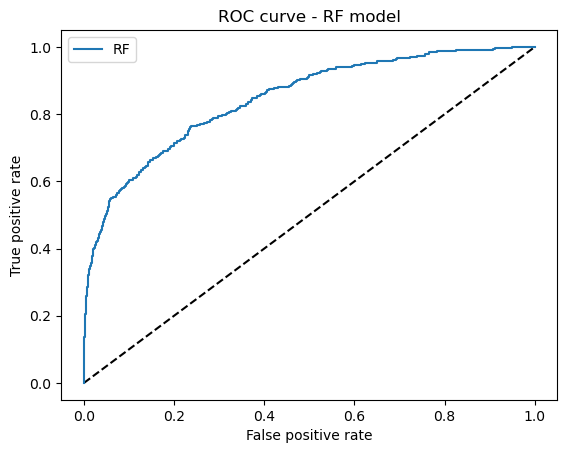

In [76]:
# ROC curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [77]:
# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8450956613207371

# 4: Model Extra Functionality

## 4.1:  Logistic Regression Model

In [ ]:
X_with_corr = X.copy()

X_with_corr = OneHotEncoding(X_with_corr, enc_ohe, ['Geography'])
X_with_corr['Gender'] = enc_oe.transform(X_with_corr[['Gender']])
X_with_corr['SalaryInRMB'] = X_with_corr['EstimatedSalary'] * 6.4
X_with_corr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,SalaryInRMB
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,648632.832
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,720272.512
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,729162.048
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,600490.432
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,506138.240


In [ ]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5272
Gender : -0.2591
Geography_Germany : 0.2279
Balance : 0.162
Geography_France : -0.1207
Geography_Spain : -0.089
CreditScore : -0.0637
NumOfProducts : -0.0586
Tenure : -0.0452
HasCrCard : -0.0199
SalaryInRMB : 0.0137
EstimatedSalary : 0.0137


## 4.2:  Random Forest Model - Feature Importance Discussion

In [ ]:
X_RF = X.copy()

X_RF = OneHotEncoding(X_RF, enc_ohe, ['Geography'])
X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])

X_RF.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [ ]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2369
EstimatedSalary : 0.1489
Balance : 0.1436
CreditScore : 0.1433
NumOfProducts : 0.1315
Tenure : 0.0816
IsActiveMember : 0.0382
Geography_Germany : 0.0211
HasCrCard : 0.0185
Gender : 0.0183
